In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [19]:
stock = 'AAPL'
start_date = '2010-01-01'
end_date = '2024-12-01'
df = yf.download(stock, start=start_date, end=end_date)
print(df.head())

[*********************100%***********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.454506  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.465665  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.362821  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.351057  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.393281  447610800


In [20]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-10-09,225.229996,229.750000,224.830002,229.539993,229.539993,33591100
2024-10-10,227.779999,229.500000,227.169998,229.039993,229.039993,28183500
2024-10-11,229.300003,229.410004,227.339996,227.550003,227.550003,31759200
2024-10-14,228.699997,231.729996,228.600006,231.300003,231.300003,39882100
2024-10-15,233.610001,237.490005,232.369995,233.850006,233.850006,64707600


In [21]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454506,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465665,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362821,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351057,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


In [22]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


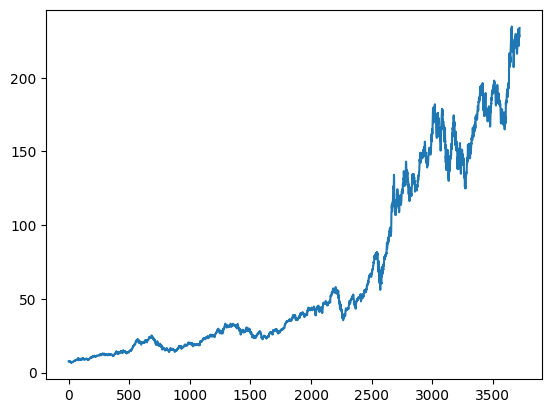

In [23]:
plt.plot(df.Close)

In [24]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3716,225.229996,229.750000,224.830002,229.539993,33591100
3717,227.779999,229.500000,227.169998,229.039993,28183500
3718,229.300003,229.410004,227.339996,227.550003,31759200
3719,228.699997,231.729996,228.600006,231.300003,39882100


In [25]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3716    216.9867
3717    217.3784
3718    217.7435
3719    218.1330
3720    218.5625
Name: Close, Length: 3721, dtype: float64

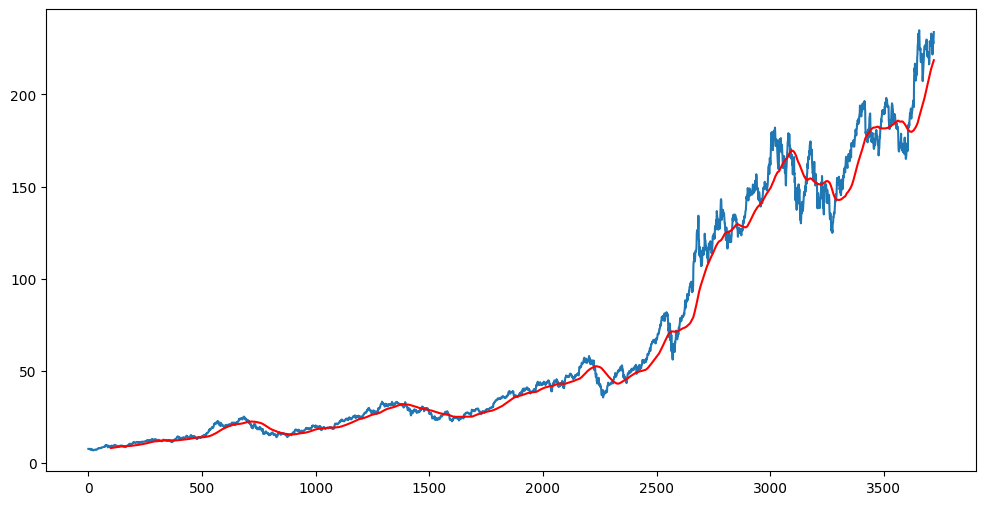

In [26]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [27]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3716    198.40490
3717    198.58210
3718    198.75460
3719    198.94535
3720    199.14670
Name: Close, Length: 3721, dtype: float64

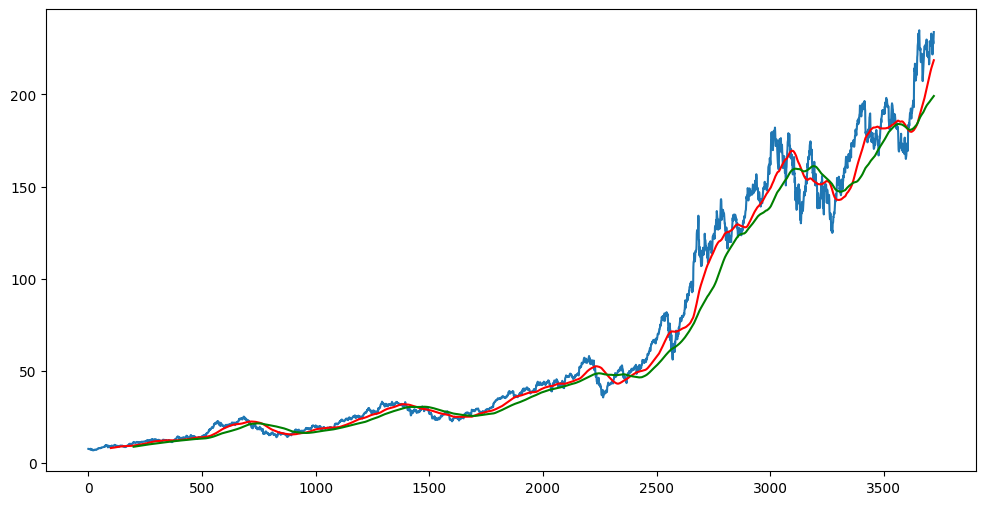

In [28]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(0, 5)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))


In [30]:
#Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2604, 1)
(1117, 1)


In [31]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [32]:
data_testing.head()

,Close
2604,77.532501
2605,78.752502
2606,77.852501
2607,76.912498
2608,77.385002


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

In [34]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01046536],
       [0.01064169],
       [0.0090166 ],
       ...,
       [0.90112226],
       [0.91136367],
       [0.92173844]])

In [35]:
x_train = []
y_train = []  

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train, y_train = np.array(x_train),np.array(y_train)

In [36]:
x_train.shape

(2504, 100, 1)

In [37]:
#ML Model

In [38]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [40]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input

# Initialize the Sequential model
model = Sequential()

# Add the input layer
model.add(Input(shape=(x_train.shape[1], 1)))

# Add first LSTM layer
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Add second LSTM layer
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Add third LSTM layer (no return_sequences for final layer)
model.add(LSTM(units=80, activation='relu'))
model.add(Dropout(0.3))

# Add final output layer
model.add(Dense(units=1))  # Output layer (1 value)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 80)                  │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              81 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,241 (321.25 KB)

 Trainable params: 82,241 (321.25 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Train the model on the training data
model.fit(x_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0419
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0033
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0032
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0028
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0025
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0026
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0022
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0021
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0020
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0022
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0017
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0017
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0016
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0018
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0016
Epoc

In [43]:
model.save('my_model.keras')


In [44]:
data_testing.head()

,Close
2604,77.532501
2605,78.752502
2606,77.852501
2607,76.912498
2608,77.385002


In [45]:
past_100_days = data_training.tail(100)

In [46]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [47]:
final_df.head()

,Close
0,68.787498
1,69.964996
2,70.102501
3,69.934998
4,70.004997


In [48]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.07102991],
       [0.07761814],
       [0.0783875 ],
       ...,
       [0.95932353],
       [0.98030519],
       [0.99457274]])

In [49]:
input_data.shape

(1217, 1)

In [50]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
     x_test.append(input_data[i-100:i])
     y_test.append(input_data[i,0])

In [51]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1117, 100, 1)
(1117,)


In [52]:
# Make predictions on test data
y_predicted = model.predict(x_test)

# Inverse transform the predictions and test data back to original scale
y_predicted = scaler.inverse_transform(y_predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [53]:
y_predicted.shape

(1117, 1)

In [54]:
y_test

array([[ 77.53250122],
       [ 78.75250244],
       [ 77.85250092],
       ...,
       [227.55000305],
       [231.30000305],
       [233.8500061 ]])

In [55]:
y_predicted

array([[ 84.51153 ],
       [ 84.89807 ],
       [ 85.338905],
       ...,
       [228.07062 ],
       [228.23886 ],
       [228.82274 ]], dtype=float32)

In [56]:
scaler.scale_

array([0.00559511])

In [57]:
scale_factor = 1/0.00646057
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

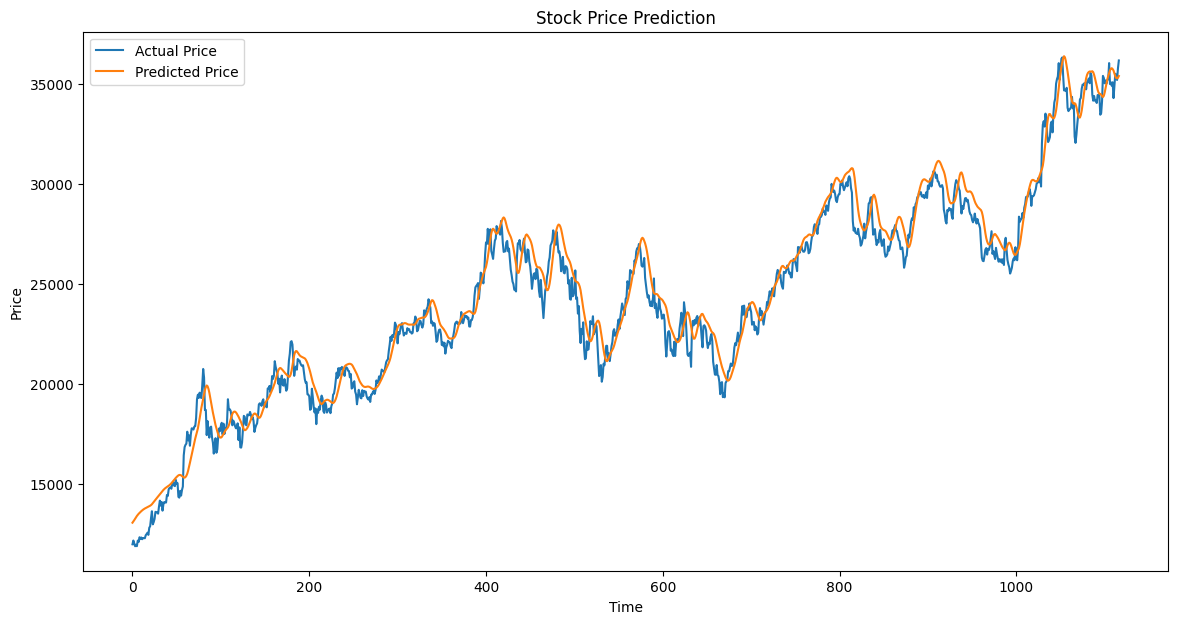

In [60]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted stock prices
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Price')  # Actual values
plt.plot(y_predicted, label='Predicted Price',)  # Predicted values
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
